In [25]:
""" 
XRP Breaks $1, Where are people trading it?
"""
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import datetime as dt
plt.style.use('Solarize_Light2')

In [26]:
def get_data(coin, currency, trailing):

  url = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym={coin}&tsym={currency}&limit={trailing}&aggregate=1"
  data2 = requests.get(url).json()['Data']['Data']
  df2 = pd.DataFrame(data2)

  df2['datetime'] = pd.to_datetime(df2['time'], unit='s')
  df2.set_index('datetime', inplace=True)

  return df2

In [27]:
XRP = get_data('XRP', 'USDT', 100)
XRP['Aggvol'] = XRP['volumeto'] + XRP ['volumefrom']
XRP

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,Aggvol
datetime,,,,,,,,,,
2020-12-28,1609113600,0.3080,0.2382,0.2839,3.858011e+09,1.070179e+09,0.2483,direct,,4.928190e+09
2020-12-29,1609200000,0.2503,0.1740,0.2483,1.016595e+10,2.198425e+09,0.2212,direct,,1.236438e+10
2020-12-30,1609286400,0.2359,0.1933,0.2212,6.639519e+09,1.405858e+09,0.2113,direct,,8.045377e+09
2020-12-31,1609372800,0.2288,0.2053,0.2113,3.647914e+09,7.926162e+08,0.2194,direct,,4.440530e+09
2021-01-01,1609459200,0.2498,0.2163,0.2194,3.773475e+09,8.889960e+08,0.2372,direct,,4.662471e+09
...,...,...,...,...,...,...,...,...,...,...
2021-04-03,1617408000,0.6421,0.5745,0.6068,1.724247e+09,1.062691e+09,0.5788,direct,,2.786938e+09
2021-04-04,1617494400,0.6357,0.5679,0.5788,1.220234e+09,7.304951e+08,0.6349,direct,,1.950729e+09
2021-04-05,1617580800,0.9353,0.6197,0.6349,5.186881e+09,4.006858e+09,0.9148,direct,,9.193739e+09


Text(0.5, 1.0, 'XRP Close and Total Trading Volume')

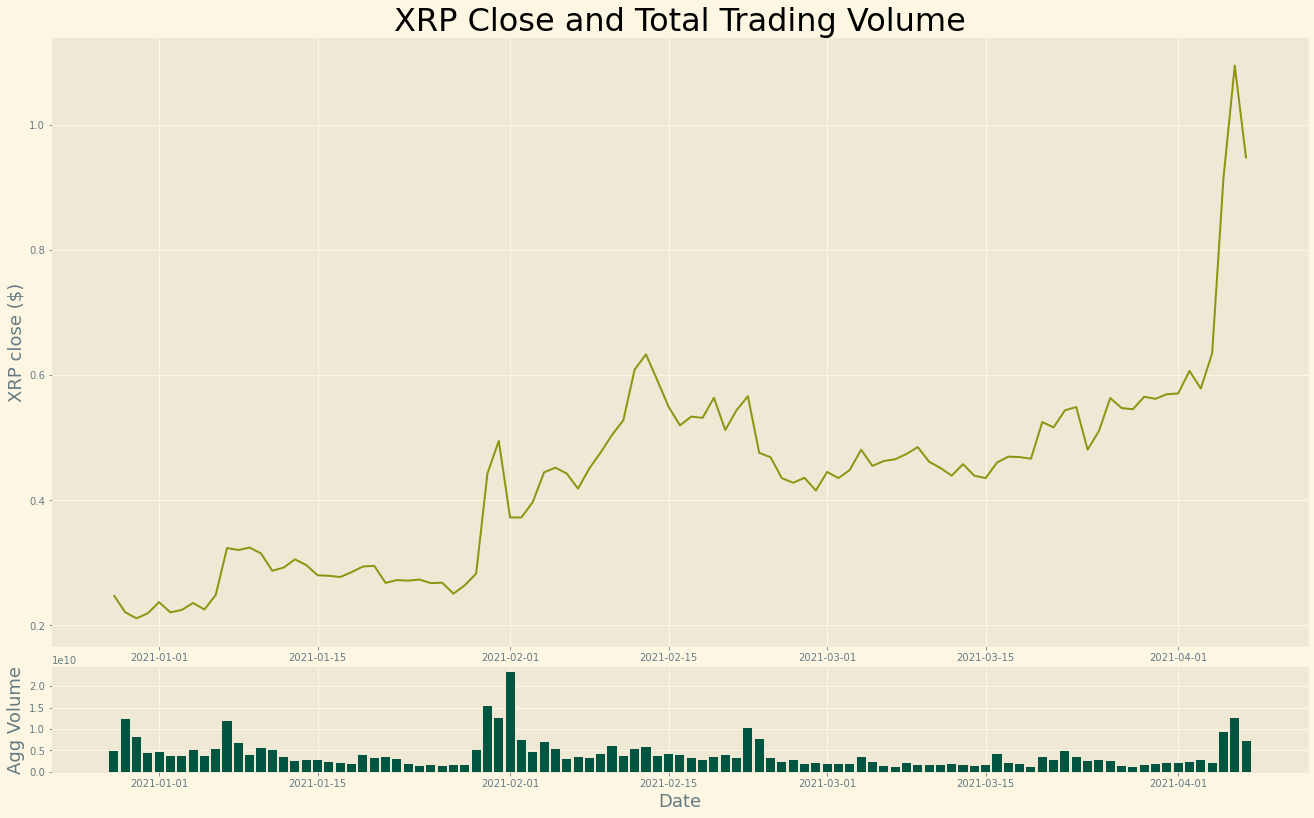

In [28]:
plt.figure(figsize=(22.5, 13.5))
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(XRP.index, XRP['close'], color='#909511', linewidth=2)
ax2.bar(XRP.index, XRP['Aggvol'], color='#005541')

plt.xlabel('Date', fontsize=18)
ax1.set_ylabel('XRP close ($)', fontsize=18)
ax2.set_ylabel('Agg Volume', fontsize=18)
ax1.set_title('XRP Close and Total Trading Volume', fontsize=32)

In [29]:
def get_exchange_data(exchange):
    
  url = f'https://min-api.cryptocompare.com/data/exchange/symbol/histohour?fsym=BTC&tsym=USD&limit=45&e={exchange}&aggregate=1'
  data = requests.get(url).json()['Data']
  df = pd.DataFrame(data)
  df['datetime'] = pd.to_datetime(df['time'], unit='s')
  df.set_index('datetime', inplace=True)

  return df

In [30]:
exchanges = ['Coinbase','Binance','Kraken', 'Bitstamp', 'Gemini', 'Bitfinex']
col_names = []
first = True

for exchange in exchanges:
  data = get_exchange_data(exchange)
  if first:
    XRP_comb = pd.DataFrame(data['volumetotal'].copy())
    col_names.append(exchange)
    XRP_comb.columns = col_names
    first = False
  else:
    XRP_comb = XRP_comb.join(data['volumetotal'])
    col_names.append(exchange)
    XRP_comb.columns = col_names

In [31]:
XRP_comb

,Coinbase,Binance,Kraken,Bitstamp,Gemini,Bitfinex
datetime,,,,,,
2021-04-05 20:00:00,3.107369e+07,4.270890e+08,19754175.74,9016101.88,2551505.10,4.401581e+07
2021-04-05 21:00:00,3.430828e+07,3.494291e+08,19208550.16,10800775.16,2604837.60,1.513552e+07
2021-04-05 22:00:00,3.447076e+07,3.782698e+08,15503863.24,8778004.84,1307838.52,1.078481e+07
2021-04-05 23:00:00,2.779979e+07,3.711012e+08,12458856.07,6347075.96,2229989.80,1.722448e+07
2021-04-06 00:00:00,6.643785e+07,5.299487e+08,26311554.77,10799718.02,3573401.20,3.053235e+07
2021-04-06 01:00:00,6.054393e+07,4.249196e+08,22074038.17,8962174.76,3270467.48,2.410419e+07
2021-04-06 02:00:00,2.130935e+07,2.695805e+08,6324459.34,3486621.19,1802958.67,5.816128e+06
2021-04-06 03:00:00,1.692457e+07,2.254851e+08,7650825.74,3281605.61,990872.52,8.880915e+06
2021-04-06 04:00:00,1.369791e+07,2.908043e+08,5839715.51,2562186.20,484399.55,2.342293e+07


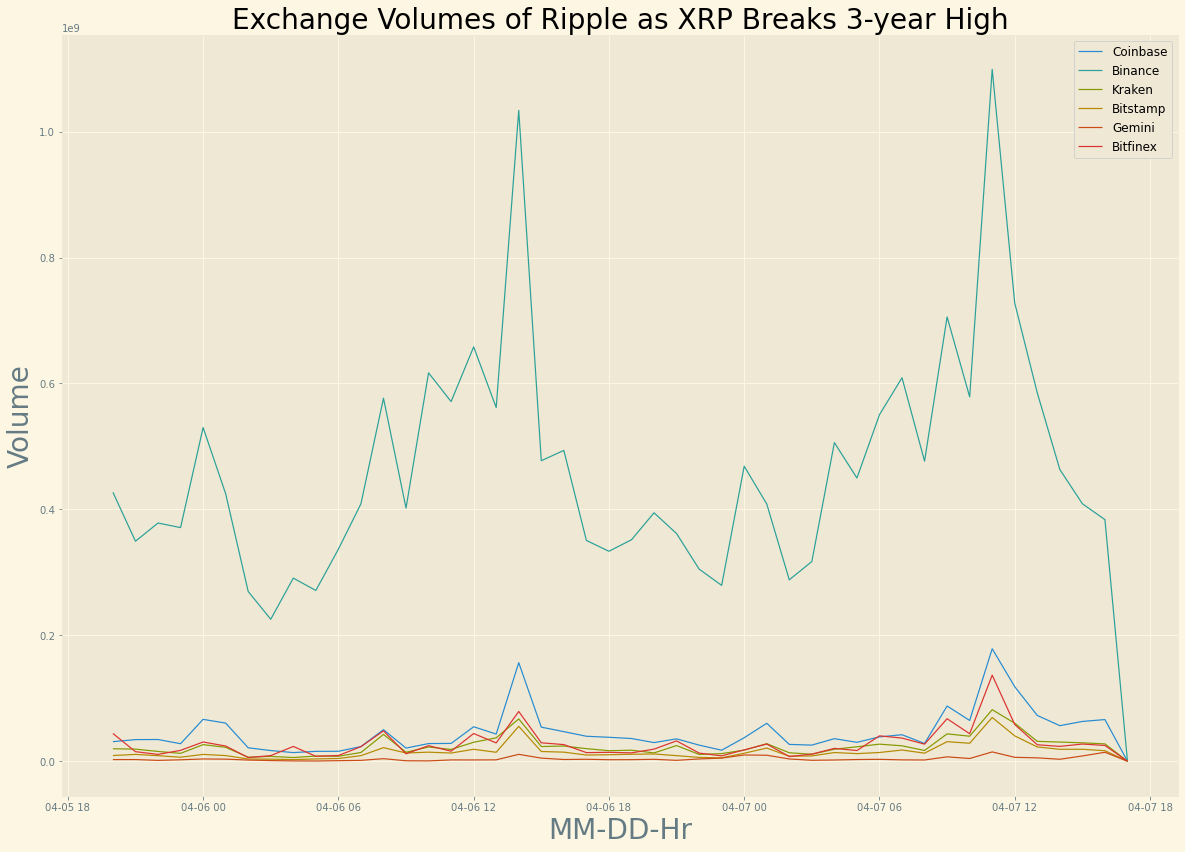

In [33]:
handles = ['Coinbase','Binance','Kraken', 'Bitstamp', 'Gemini', 'Bitfinex']

plt.figure(figsize=(20,14))
plt.title(f'Exchange Volumes of Ripple as XRP Breaks 3-year High', fontsize=28)
plt.xlabel('MM-DD-Hr', fontsize=28)
plt.ylabel(f'Volume', fontsize=28)
handles = ['Coinbase', 'Binance', 'Kraken', 'Bitstamp', 'Gemini', 'Bitfinex']
plt.plot(XRP_comb, linewidth=1.2)
plt.legend(labels=handles, fontsize='large')